# Data Processing

In [1]:
import matplotlib.pylab as plt
%matplotlib inline

import warnings
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima_model import ARIMA
import itertools
import pandas as pd

In [2]:
#importing data

country_Code = pd.read_excel('Ecodataset.xlsx', sheet_name="Country Code")
export_Data = pd.read_excel('Ecodataset.xlsx', sheet_name="Exports")
import_Data = pd.read_excel('Ecodataset.xlsx', sheet_name="Imports")
agriculture_Data = pd.read_excel('Ecodataset.xlsx', sheet_name="Agriculture")
manufacture_Data = pd.read_excel('Ecodataset.xlsx', sheet_name="Manufacturing")
industry_Data = pd.read_excel('Ecodataset.xlsx', sheet_name="Industry")
gross_cap_Data = pd.read_excel('Ecodataset.xlsx', sheet_name="Gross capital formation")
revenue_excluding_Data = pd.read_excel('Ecodataset.xlsx', sheet_name="Revenue excluding grants")
foreign_investment_Data = pd.read_excel('Ecodataset.xlsx', sheet_name="Foreign direct investment")
stocks_Data = pd.read_excel('Ecodataset.xlsx', sheet_name="Stocks traded")
gdp_Data = pd.read_excel('Ecodataset.xlsx', sheet_name="GDP_growth")

In [3]:
year = []
myDATA = [export_Data, 
          import_Data, 
          agriculture_Data, 
          manufacture_Data, 
          industry_Data,
          gross_cap_Data, 
          revenue_excluding_Data, 
          foreign_investment_Data,
          stocks_Data, 
          gdp_Data]
year.extend(range(1960, 2020))
year = [str(y)+"-04-01" for y in year]

for i in range(len(country_Code)):
    print(country_Code.iloc[i, 0] + " : " + country_Code.iloc[i, 1])

c_code = input("\nEnter country code: ").upper()
country = ""

mydict = {}                                #dictionary for each column 
count=0
for data in myDATA:
    col=[]
    for i in range(len(data)):
        if(data.iloc[i, 1] == c_code):
            country = data.iloc[i, 0]
            for j in range(4, len(data.columns)):
                col.append("%.2f"%data.iloc[i, j])
            mydict.update({"x"+str(count):col})
            count=count+1
            break
mydict.update({"Year" : year})
new_Data = pd.DataFrame(mydict)
new_Data['Year'] = pd.to_datetime(new_Data['Year'], infer_datetime_format = True)

#renaming the columns
new_Data.rename(columns={'x0':'Exports', 
                         'x1':'Imports', 
                         'x2':'Agriculture', 
                         'x3':'Manufacturing', 
                         'x4':'Industry',
                         'x5':'Gross_capital', 
                         'x6':'Revenue', 
                         'x7':'Foreign_investment',
                         'x8':'Stocks_traded',
                         'x9':'GDP_growth'}, inplace=True)

Aruba : ABW
Afghanistan : AFG
Angola : AGO
Albania : ALB
Andorra : AND
Arab World : ARB
United Arab Emirates : ARE
Argentina : ARG
Armenia : ARM
American Samoa : ASM
Antigua and Barbuda : ATG
Australia : AUS
Austria : AUT
Azerbaijan : AZE
Burundi : BDI
Belgium : BEL
Benin : BEN
Burkina Faso : BFA
Bangladesh : BGD
Bulgaria : BGR
Bahrain : BHR
Bahamas, The : BHS
Bosnia and Herzegovina : BIH
Belarus : BLR
Belize : BLZ
Bermuda : BMU
Bolivia : BOL
Brazil : BRA
Barbados : BRB
Brunei Darussalam : BRN
Bhutan : BTN
Botswana : BWA
Central African Republic : CAF
Canada : CAN
Central Europe and the Baltics : CEB
Switzerland : CHE
Channel Islands : CHI
Chile : CHL
China : CHN
Cote d'Ivoire : CIV
Cameroon : CMR
Congo, Dem. Rep. : COD
Congo, Rep. : COG
Colombia : COL
Comoros : COM
Cabo Verde : CPV
Costa Rica : CRI
Caribbean small states : CSS
Cuba : CUB
Curacao : CUW
Cayman Islands : CYM
Cyprus : CYP
Czech Republic : CZE
Germany : DEU
Djibouti : DJI
Dominica : DMA
Denmark : DNK
Dominican Republic : D

In [4]:
new_Data = new_Data.set_index(['Year'])
print("Dataset for " + country + ":")
new_Data

Dataset for India:


,Exports,Imports,Agriculture,Manufacturing,Industry,Gross_capital,Revenue,Foreign_investment,Stocks_traded,GDP_growth
Year,,,,,,,,,,
1960-04-01,4.46,6.83,41.31,14.75,20.83,15.69,nan,nan,nan,nan
1961-04-01,4.30,5.96,40.39,15.35,21.43,14.78,nan,nan,nan,3.72
1962-04-01,4.17,6.03,38.37,15.86,22.05,16.43,nan,nan,nan,2.93
1963-04-01,4.28,5.91,39.32,15.75,21.88,15.71,nan,nan,nan,5.99
1964-04-01,3.73,5.68,41.19,14.85,20.96,15.90,nan,nan,nan,7.45
1965-04-01,3.31,5.21,38.95,15.01,21.66,17.85,nan,nan,nan,-2.64
1966-04-01,4.14,6.67,40.03,14.50,21.39,18.34,nan,nan,nan,-0.06
1967-04-01,4.03,5.95,42.77,13.23,20.09,15.71,nan,nan,nan,7.83
1968-04-01,4.04,4.94,41.63,13.52,20.63,14.38,nan,nan,nan,3.39


In [5]:
# Handling the missing values ('nan', '0.00') using mean

meanList = []
for cols in list(new_Data.columns.values):   #iterating over all the columns in 'new_Data'
    s = 0
    count = 0
    colVal = new_Data.loc[:, cols]
    for i in list(colVal):
        if( i not in ['nan', '0.00'] ):      #restrict the operation for the value 'nan' and '0.00'
            s = s + float(i)
            count = count + 1
    if(count == 0):
        meanList.append('0')
    else:
        meanList.append("%.2f"%(s/count))

#pop the last element of meanList which consists of Year
#meanList.pop()     
        
meanList = [float(i) for i in meanList]
columns = list(new_Data.columns)
print("Mean values for the respective columns of the above dataset are as follows:\n")

for i in range(len(columns)):
    print(columns[i] + ": " + str(meanList[i]))

Mean values for the respective columns of the above dataset are as follows:

Exports: 10.62
Imports: 12.49
Agriculture: 28.0
Manufacturing: 15.88
Industry: 25.93
Gross_capital: 25.4
Revenue: 12.03
Foreign_investment: 0.82
Stocks_traded: 52.48
GDP_growth: 5.25


In [6]:
col_no = 0
for m in meanList:
    for i in range(len(new_Data)):
        if(new_Data.iloc[i, col_no] in ['nan', '0.00'] ):     #replacing the values 'nan' and '0.00' with the mean value
            new_Data.iloc[i, col_no] = float(m)
        else:
            new_Data.iloc[i, col_no] = float(new_Data.iloc[i, col_no]) #converting every single value of the cell to float value
    col_no = col_no + 1
    
print("Processed dataset for " + country + ":")
new_Data

Processed dataset for India:


,Exports,Imports,Agriculture,Manufacturing,Industry,Gross_capital,Revenue,Foreign_investment,Stocks_traded,GDP_growth
Year,,,,,,,,,,
1960-04-01,4.46,6.83,41.31,14.75,20.83,15.69,12.03,0.82,52.48,5.25
1961-04-01,4.3,5.96,40.39,15.35,21.43,14.78,12.03,0.82,52.48,3.72
1962-04-01,4.17,6.03,38.37,15.86,22.05,16.43,12.03,0.82,52.48,2.93
1963-04-01,4.28,5.91,39.32,15.75,21.88,15.71,12.03,0.82,52.48,5.99
1964-04-01,3.73,5.68,41.19,14.85,20.96,15.9,12.03,0.82,52.48,7.45
1965-04-01,3.31,5.21,38.95,15.01,21.66,17.85,12.03,0.82,52.48,-2.64
1966-04-01,4.14,6.67,40.03,14.5,21.39,18.34,12.03,0.82,52.48,-0.06
1967-04-01,4.03,5.95,42.77,13.23,20.09,15.71,12.03,0.82,52.48,7.83
1968-04-01,4.04,4.94,41.63,13.52,20.63,14.38,12.03,0.82,52.48,3.39


In [7]:
#from datetime import datetime
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10,10

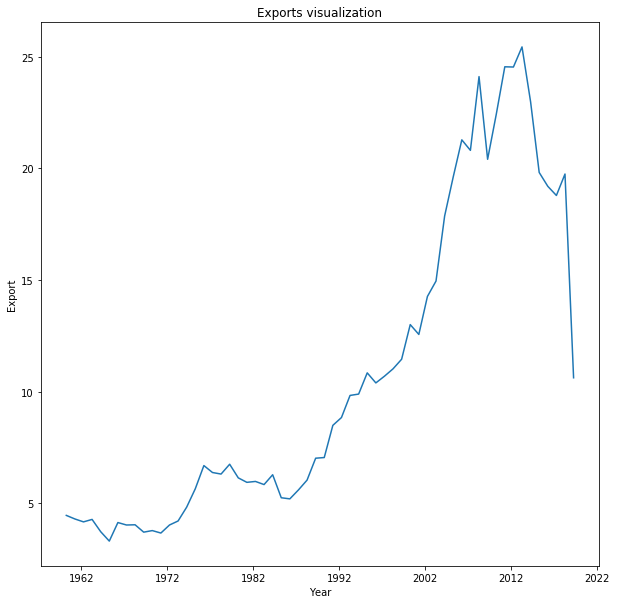

In [8]:
plt.title('Exports visualization')
plt.xlabel("Year")
plt.ylabel("Export")
plt.plot(new_Data['Exports'])

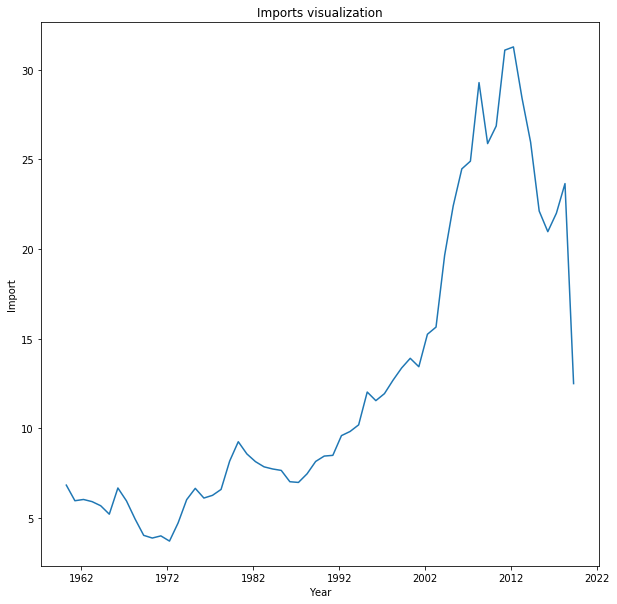

In [9]:
plt.title('Imports visualization')
plt.xlabel("Year")
plt.ylabel("Import")
plt.plot(new_Data['Imports'])

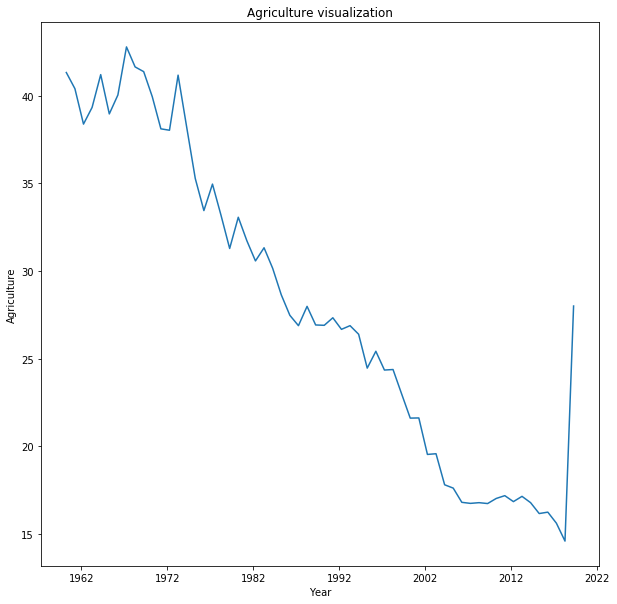

In [10]:
plt.title('Agriculture visualization')
plt.xlabel("Year")
plt.ylabel("Agriculture")
plt.plot(new_Data['Agriculture'])

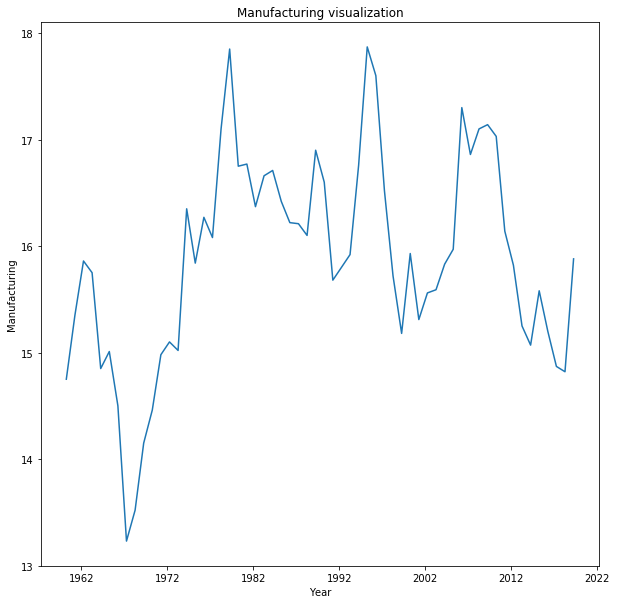

In [11]:
plt.title('Manufacturing visualization')
plt.xlabel("Year")
plt.ylabel("Manufacturing")
plt.plot(new_Data['Manufacturing'])

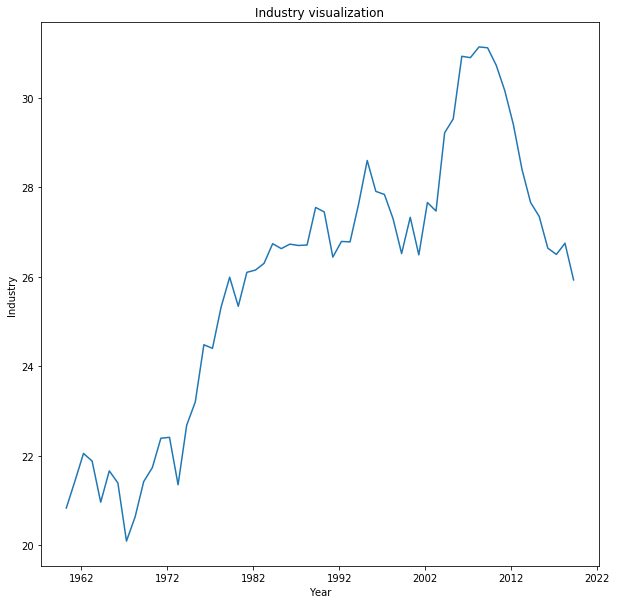

In [12]:
plt.title('Industry visualization')
plt.xlabel("Year")
plt.ylabel("Industry")
plt.plot(new_Data['Industry'])

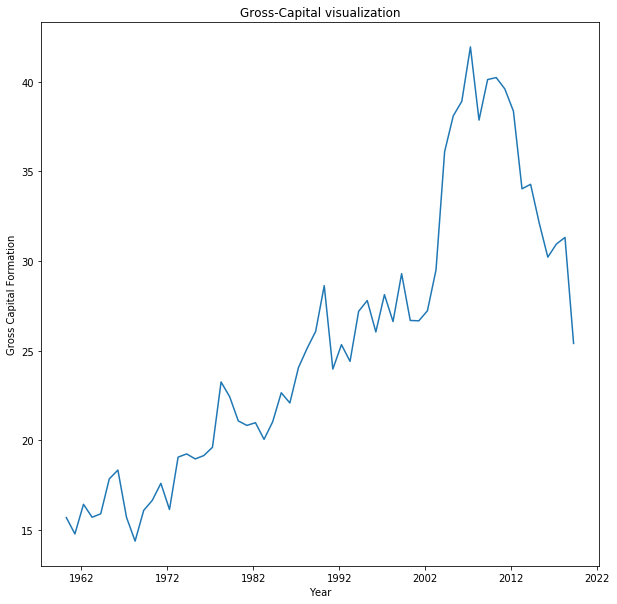

In [13]:
plt.title('Gross-Capital visualization')
plt.xlabel("Year")
plt.ylabel("Gross Capital Formation")
plt.plot(new_Data['Gross_capital'])

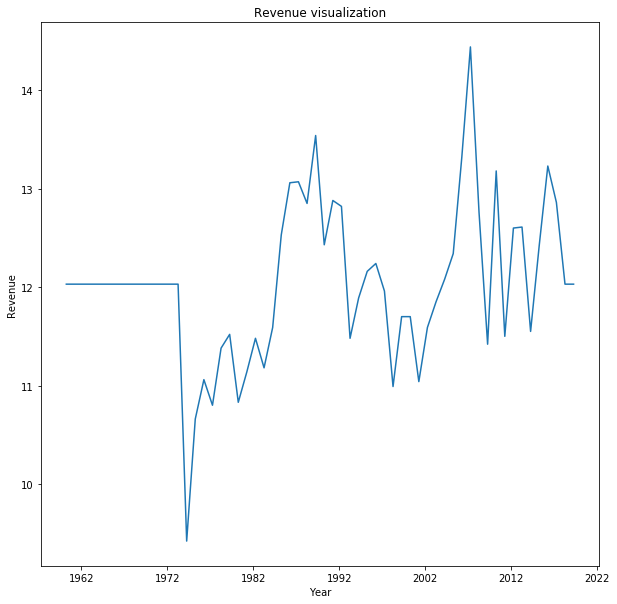

In [14]:
plt.title('Revenue visualization')
plt.xlabel("Year")
plt.ylabel("Revenue")
plt.plot(new_Data['Revenue'])

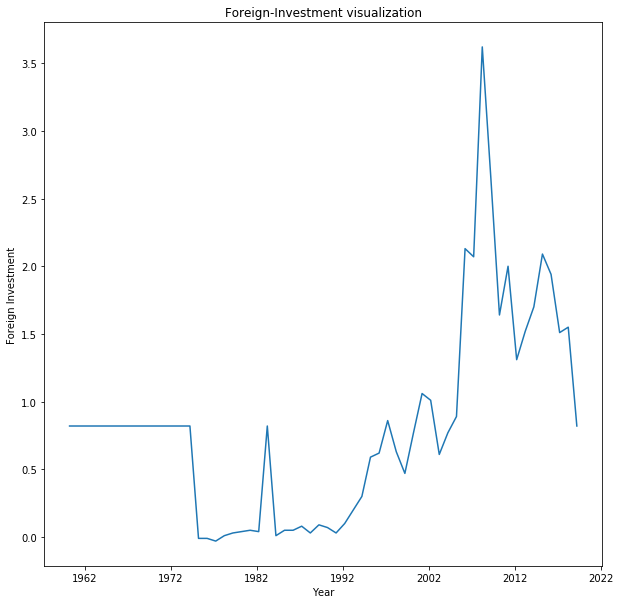

In [15]:
plt.title('Foreign-Investment visualization')
plt.xlabel("Year")
plt.ylabel("Foreign Investment")
plt.plot(new_Data['Foreign_investment'])

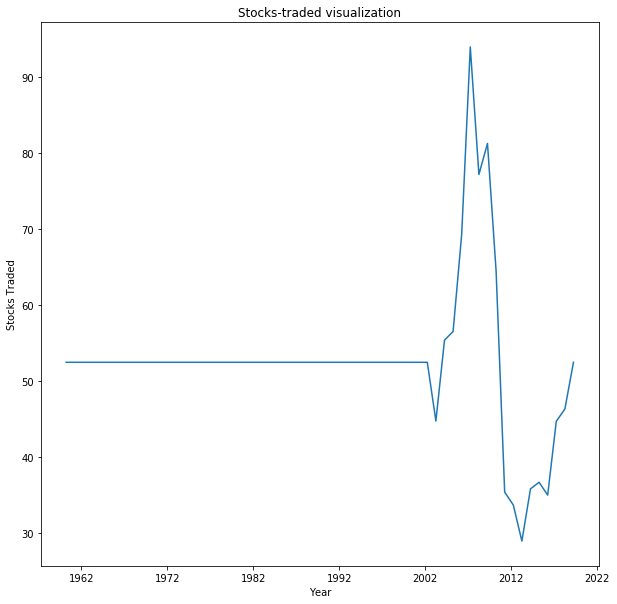

In [16]:
plt.title('Stocks-traded visualization')
plt.xlabel("Year")
plt.ylabel("Stocks Traded")
plt.plot(new_Data['Stocks_traded'])

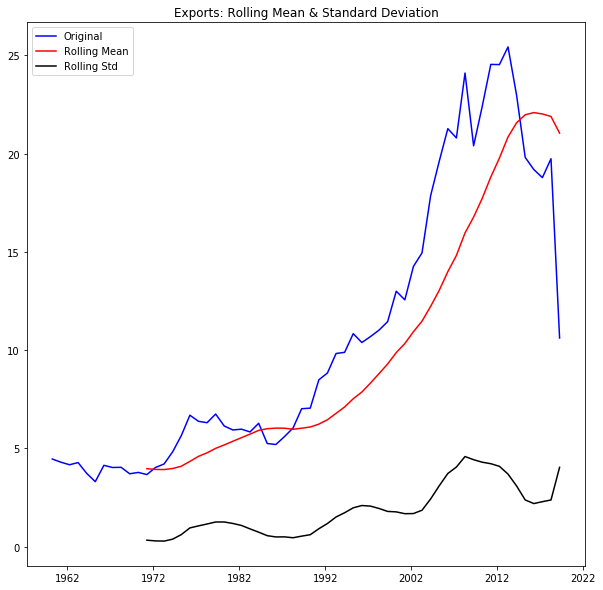

result of DCF Test
Text Statistic            -3.343847
p-value                    0.013029
#Lags Used                 6.000000
Number of observations    53.000000
Critical value(1%)        -3.560242
Critical value(5%)        -2.917850
Critical value(10%)       -2.596796
dtype: float64


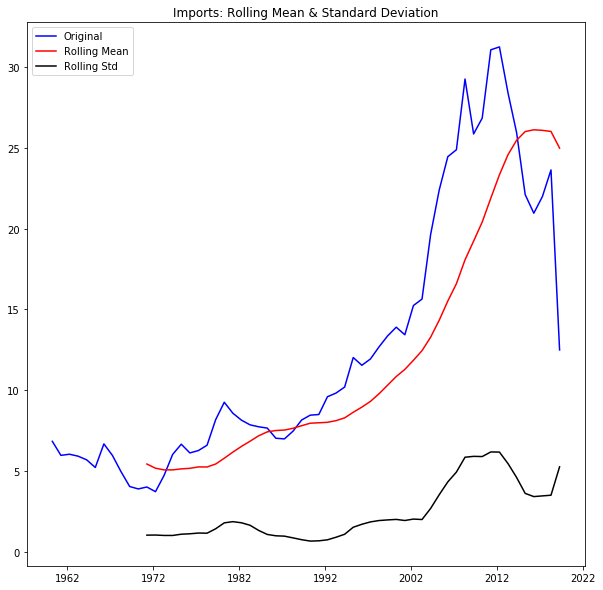

result of DCF Test
Text Statistic            -0.311659
p-value                    0.923837
#Lags Used                11.000000
Number of observations    48.000000
Critical value(1%)        -3.574589
Critical value(5%)        -2.923954
Critical value(10%)       -2.600039
dtype: float64


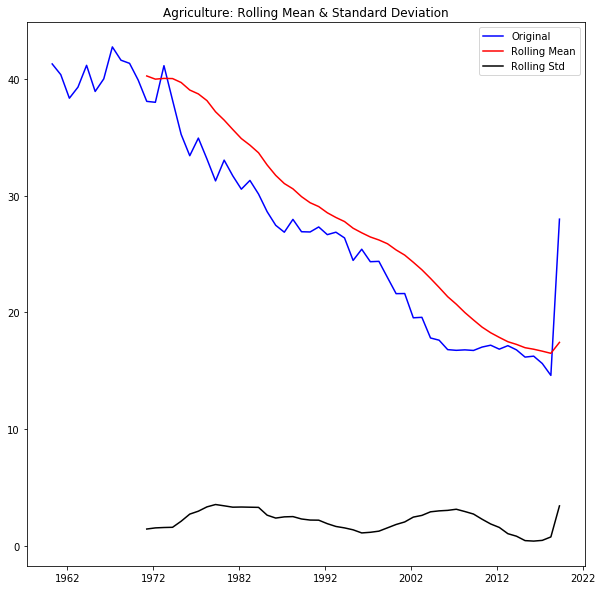

result of DCF Test
Text Statistic            -1.550952
p-value                    0.508173
#Lags Used                 0.000000
Number of observations    59.000000
Critical value(1%)        -3.546395
Critical value(5%)        -2.911939
Critical value(10%)       -2.593652
dtype: float64


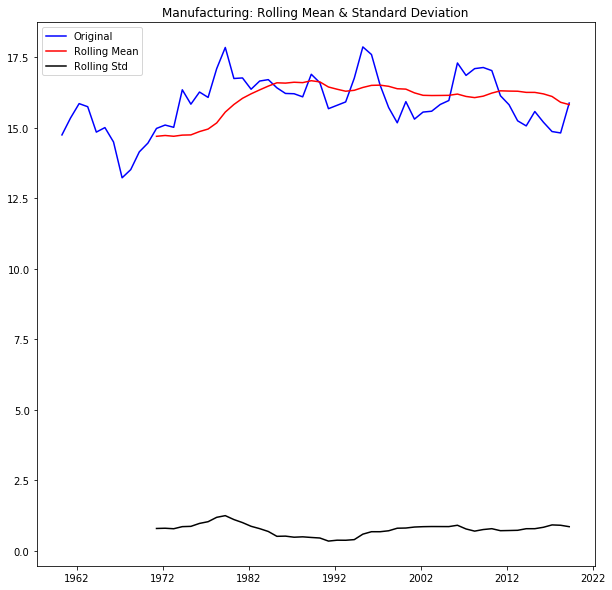

result of DCF Test
Text Statistic            -2.607345
p-value                    0.091489
#Lags Used                 0.000000
Number of observations    59.000000
Critical value(1%)        -3.546395
Critical value(5%)        -2.911939
Critical value(10%)       -2.593652
dtype: float64


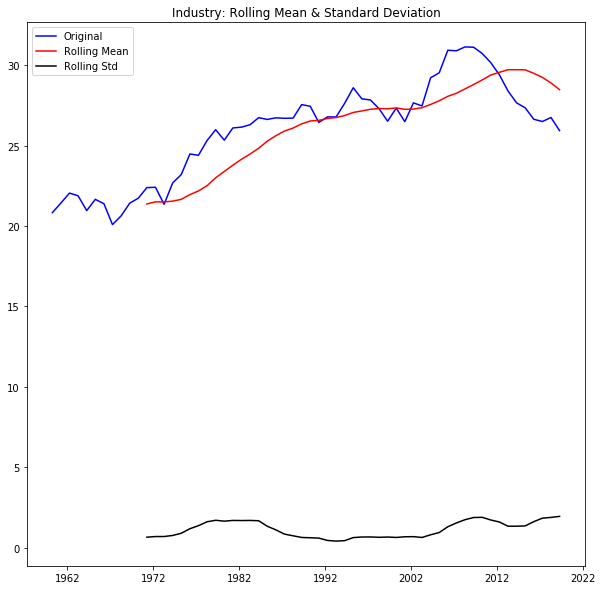

result of DCF Test
Text Statistic            -1.472581
p-value                    0.547029
#Lags Used                 2.000000
Number of observations    57.000000
Critical value(1%)        -3.550670
Critical value(5%)        -2.913766
Critical value(10%)       -2.594624
dtype: float64


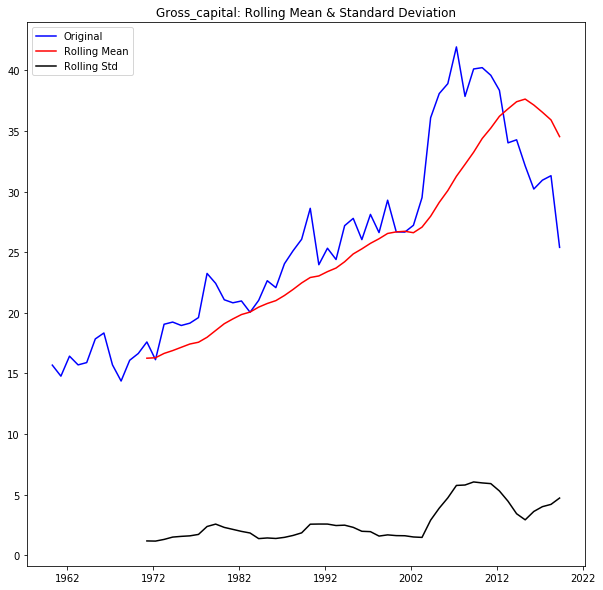

result of DCF Test
Text Statistic            -1.447745
p-value                    0.559185
#Lags Used                 0.000000
Number of observations    59.000000
Critical value(1%)        -3.546395
Critical value(5%)        -2.911939
Critical value(10%)       -2.593652
dtype: float64


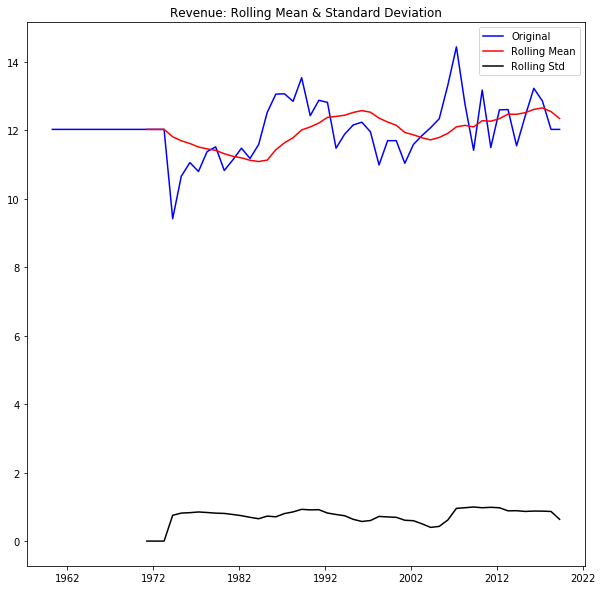

result of DCF Test
Text Statistic            -4.096842
p-value                    0.000980
#Lags Used                 0.000000
Number of observations    59.000000
Critical value(1%)        -3.546395
Critical value(5%)        -2.911939
Critical value(10%)       -2.593652
dtype: float64


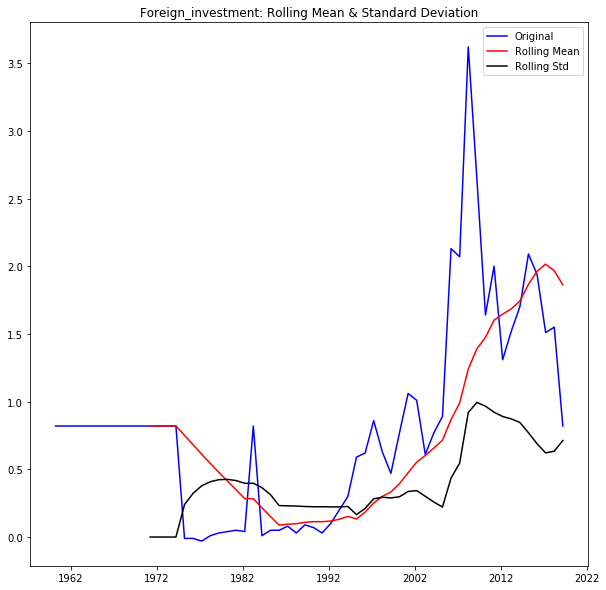

result of DCF Test
Text Statistic            -2.155258
p-value                    0.222883
#Lags Used                 0.000000
Number of observations    59.000000
Critical value(1%)        -3.546395
Critical value(5%)        -2.911939
Critical value(10%)       -2.593652
dtype: float64


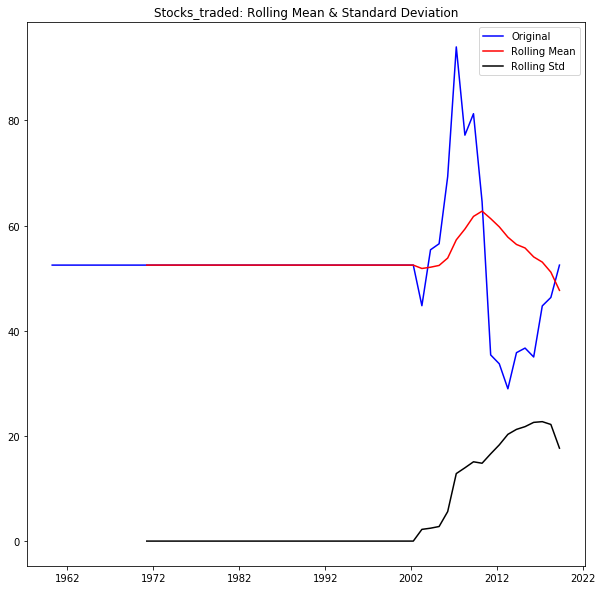

result of DCF Test
Text Statistic            -2.252197
p-value                    0.187849
#Lags Used                11.000000
Number of observations    48.000000
Critical value(1%)        -3.574589
Critical value(5%)        -2.923954
Critical value(10%)       -2.600039
dtype: float64


In [17]:
#Dicky Fuller test

from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries, col):
      
        movingAvg = timeseries.rolling(window=12).mean()
        movingStd = timeseries.rolling(window=12).std()
        
        org = plt.plot(timeseries, color = 'blue', label='Original')
        mean =plt.plot(movingAvg, color ='red', label= 'Rolling Mean')
        std = plt.plot(movingStd, color ='black', label = 'Rolling Std')
        plt.legend(loc = 'best')
        plt.title(col + ': Rolling Mean & Standard Deviation')
        plt.show(block=False)
        
        
        print("result of DCF Test")
        dftest = adfuller(timeseries, autolag='AIC')
        dfoutput = pd.Series(dftest[0:4], index = ['Text Statistic', 'p-value', '#Lags Used','Number of observations'])
        
        for key, value in dftest[4].items():
            dfoutput['Critical value(%s)'%key] = value
        print(dfoutput)

columns.pop()
for col in columns:
    test_stationarity(new_Data[col], col)

# GDP Prediction

In [7]:
data_gdp = new_Data['GDP_growth']
X = data_gdp.values
train=list(X[0:59])
p = d = q = range(0,8)
pdq = list(itertools.product(p,d,q))

i=0
n=99999
warnings.filterwarnings('ignore')
for param in pdq:
    try:
        model_arima = ARIMA(train,order=param)
        model_arima_fit = model_arima.fit()
        print(param,model_arima_fit.aic)
        if (i>1 and model_arima_fit.aic<n) :
            n=model_arima_fit.aic
            p=param
        i=2    
    except:
        continue

(0, 0, 0) 296.74902114668106
(0, 0, 1) 298.51539914907414
(0, 0, 2) 300.5059299635626
(0, 0, 3) 300.7646246834578
(0, 0, 4) 301.8624288855294
(0, 0, 5) 302.99505447337845
(0, 0, 6) 295.3056807676028
(0, 0, 7) 292.6224039582897
(0, 1, 0) 329.040449897803
(0, 1, 1) 286.77535338959956
(0, 2, 0) 386.0385413768354
(0, 2, 1) 330.4801964396811
(1, 0, 0) 298.5156442122469
(1, 0, 1) 296.8545754129917
(1, 1, 0) 316.409327461014
(1, 1, 1) 287.6086875921228
(1, 2, 0) 360.7260561191929
(2, 0, 0) 300.51075016617153
(2, 1, 0) 305.78690694098873
(2, 1, 1) 286.54925963575283
(2, 1, 2) 286.9026647202344
(2, 2, 0) 336.28386789690796
(3, 0, 0) 300.564454597699
(3, 0, 1) 301.5974926464573
(3, 1, 0) 306.95831443515067
(3, 1, 1) 288.3632586044382
(3, 1, 2) 287.7547686008138
(3, 1, 7) 287.10087908476584
(3, 2, 0) 334.3769095744221
(4, 0, 0) 302.22491446784124
(4, 0, 1) 303.5820262975799
(4, 0, 2) 303.98006651188007
(4, 0, 3) 300.7073894330084
(4, 1, 0) 301.3918955171541
(4, 1, 1) 282.05804279674857
(4, 1, 2) 

In [8]:
model_arima = ARIMA(train,order=p)
model_arima_fit = model_arima.fit()
#print(model_arima_fit.aic)
predictions= ("%.2f"%float(model_arima_fit.forecast(steps=1)[0]))
print("GDP Growth predicted for the country, " + country + " in the year 2020: " + str(predictions))

GDP Growth predicted for the country, India in the year 2020: 7.33


In [9]:
print(columns)

['Exports', 'Imports', 'Agriculture', 'Manufacturing', 'Industry', 'Adjusted', 'Gross_capital', 'Revenue', 'Foreign_investment', 'Natural_resources_rents', 'Stocks_traded', 'GDP_growth']
